# Publication Visuals

## Histogram Comparisons
- identify tiles that are largely composed of a single class (each color represents the tile, not the class)
- show all s2 bands?
- key message is to illstrate that there was enough separability between the spectral signatures that it was worth investigating further.

Potential tiles:
-  (1670, 1075), (1659, 1070), 'Agroforestry x Agroforestry' - illustrate two AF plots with quite different signatures, find out what type of agroforestry these were

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy as np
sys.path.append('../../src/')
import utils.quick_viz as make
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


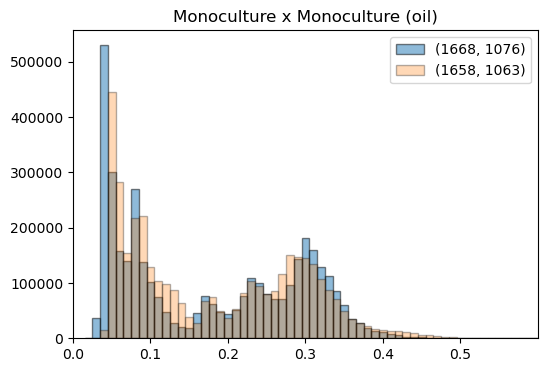

In [57]:
# abirem in blue, pd_southeast in orange
make.hist_compare_s2('ghana', (1668, 1076), (1658, 1063), 'Monoculture x Monoculture (oil)');

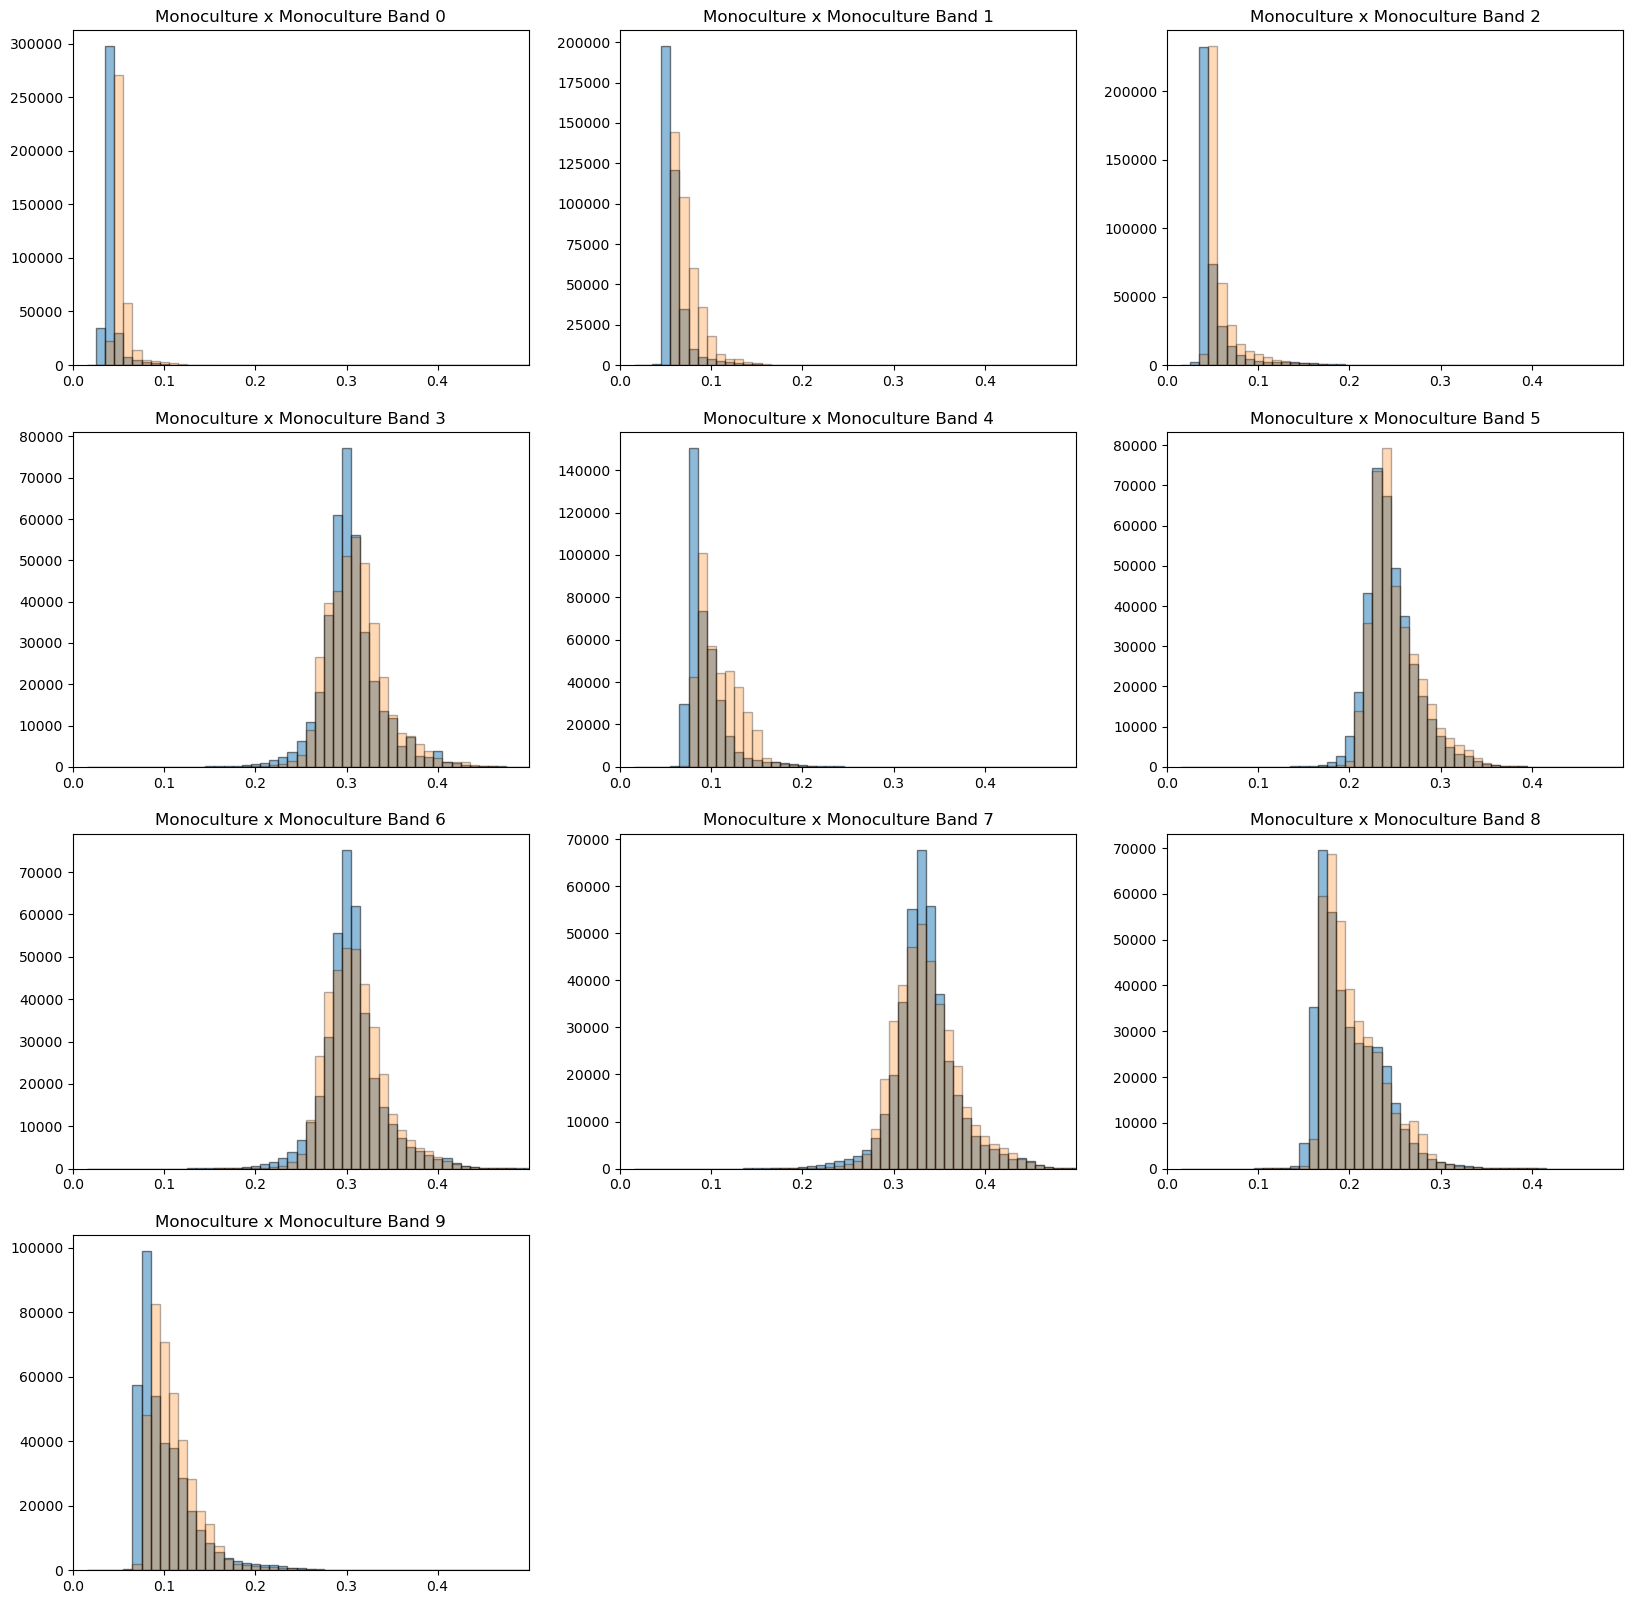

In [9]:
make.hist_compare_s2_byband('ghana', (1668, 1076), (1658, 1063), 'Monoculture x Monoculture');

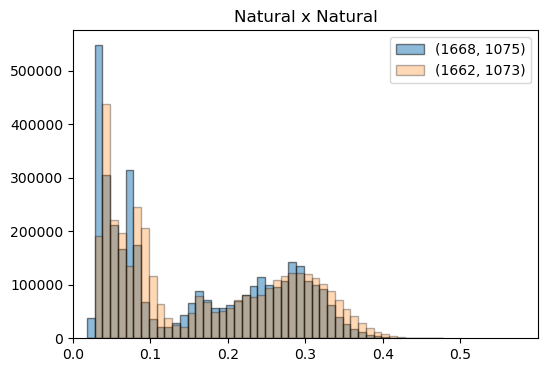

In [11]:
make.hist_compare_s2('ghana', (1668, 1075), (1662, 1073), 'Natural x Natural');

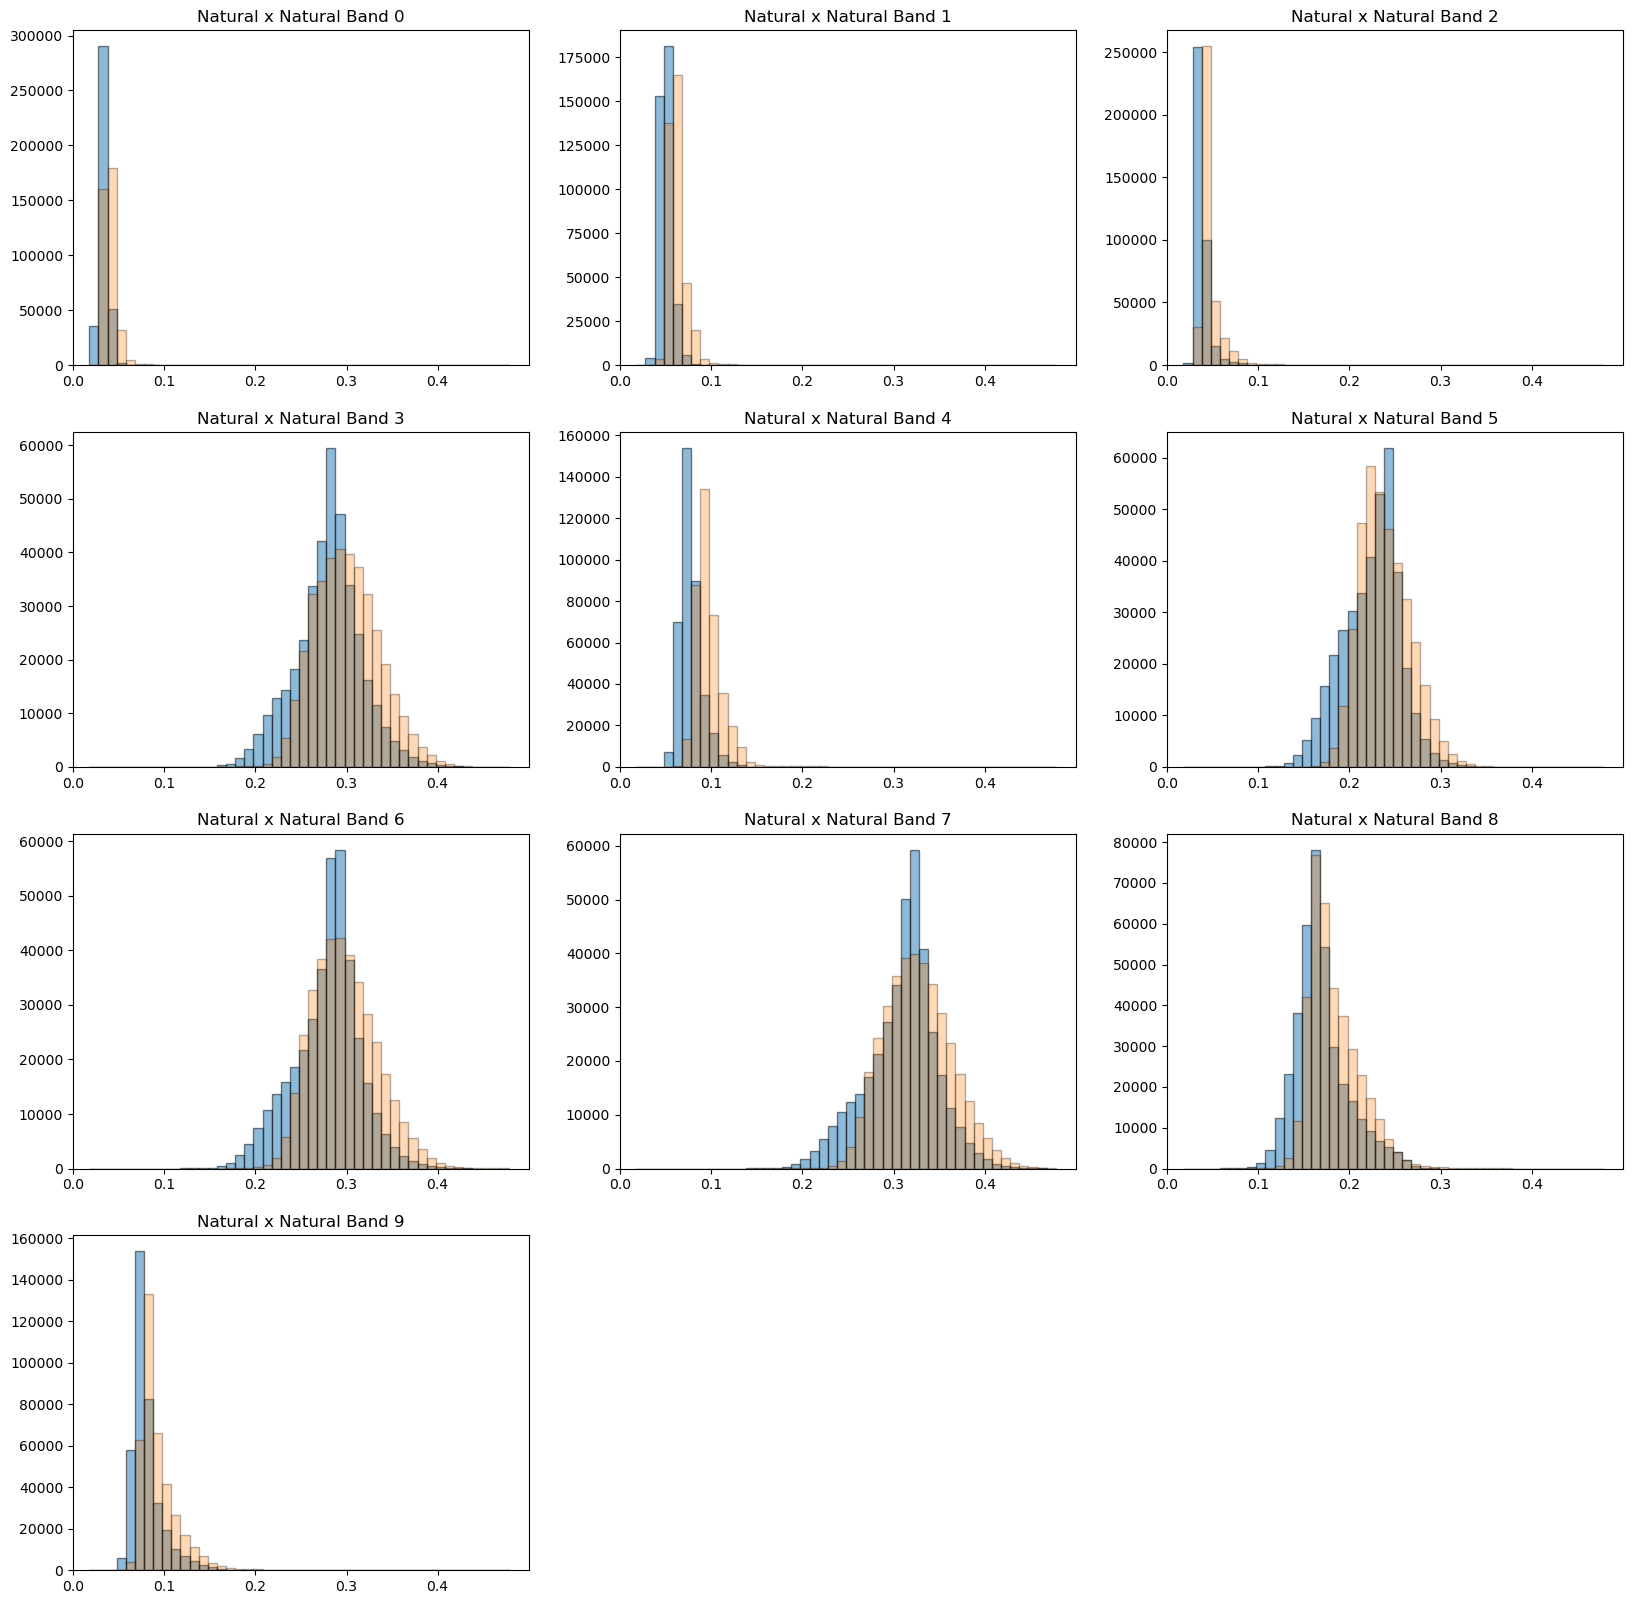

In [12]:
make.hist_compare_s2_byband('ghana', (1668, 1075), (1662, 1073), 'Natural x Natural');

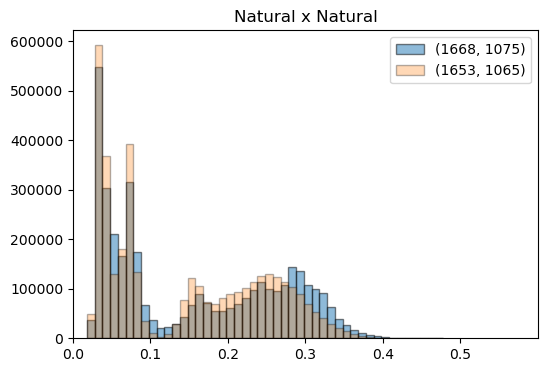

In [13]:
make.hist_compare_s2('ghana', (1668, 1075), (1653, 1065), 'Natural x Natural');

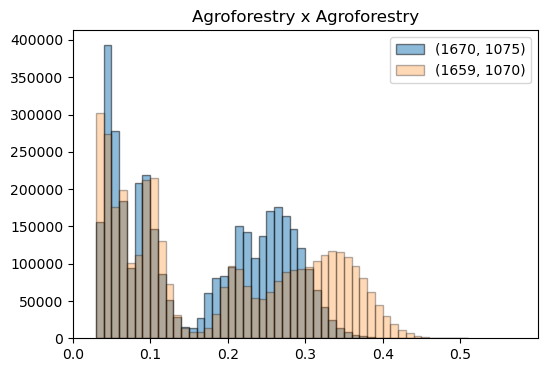

In [14]:
make.hist_compare_s2('ghana', (1670, 1075), (1659, 1070), 'Agroforestry x Agroforestry');

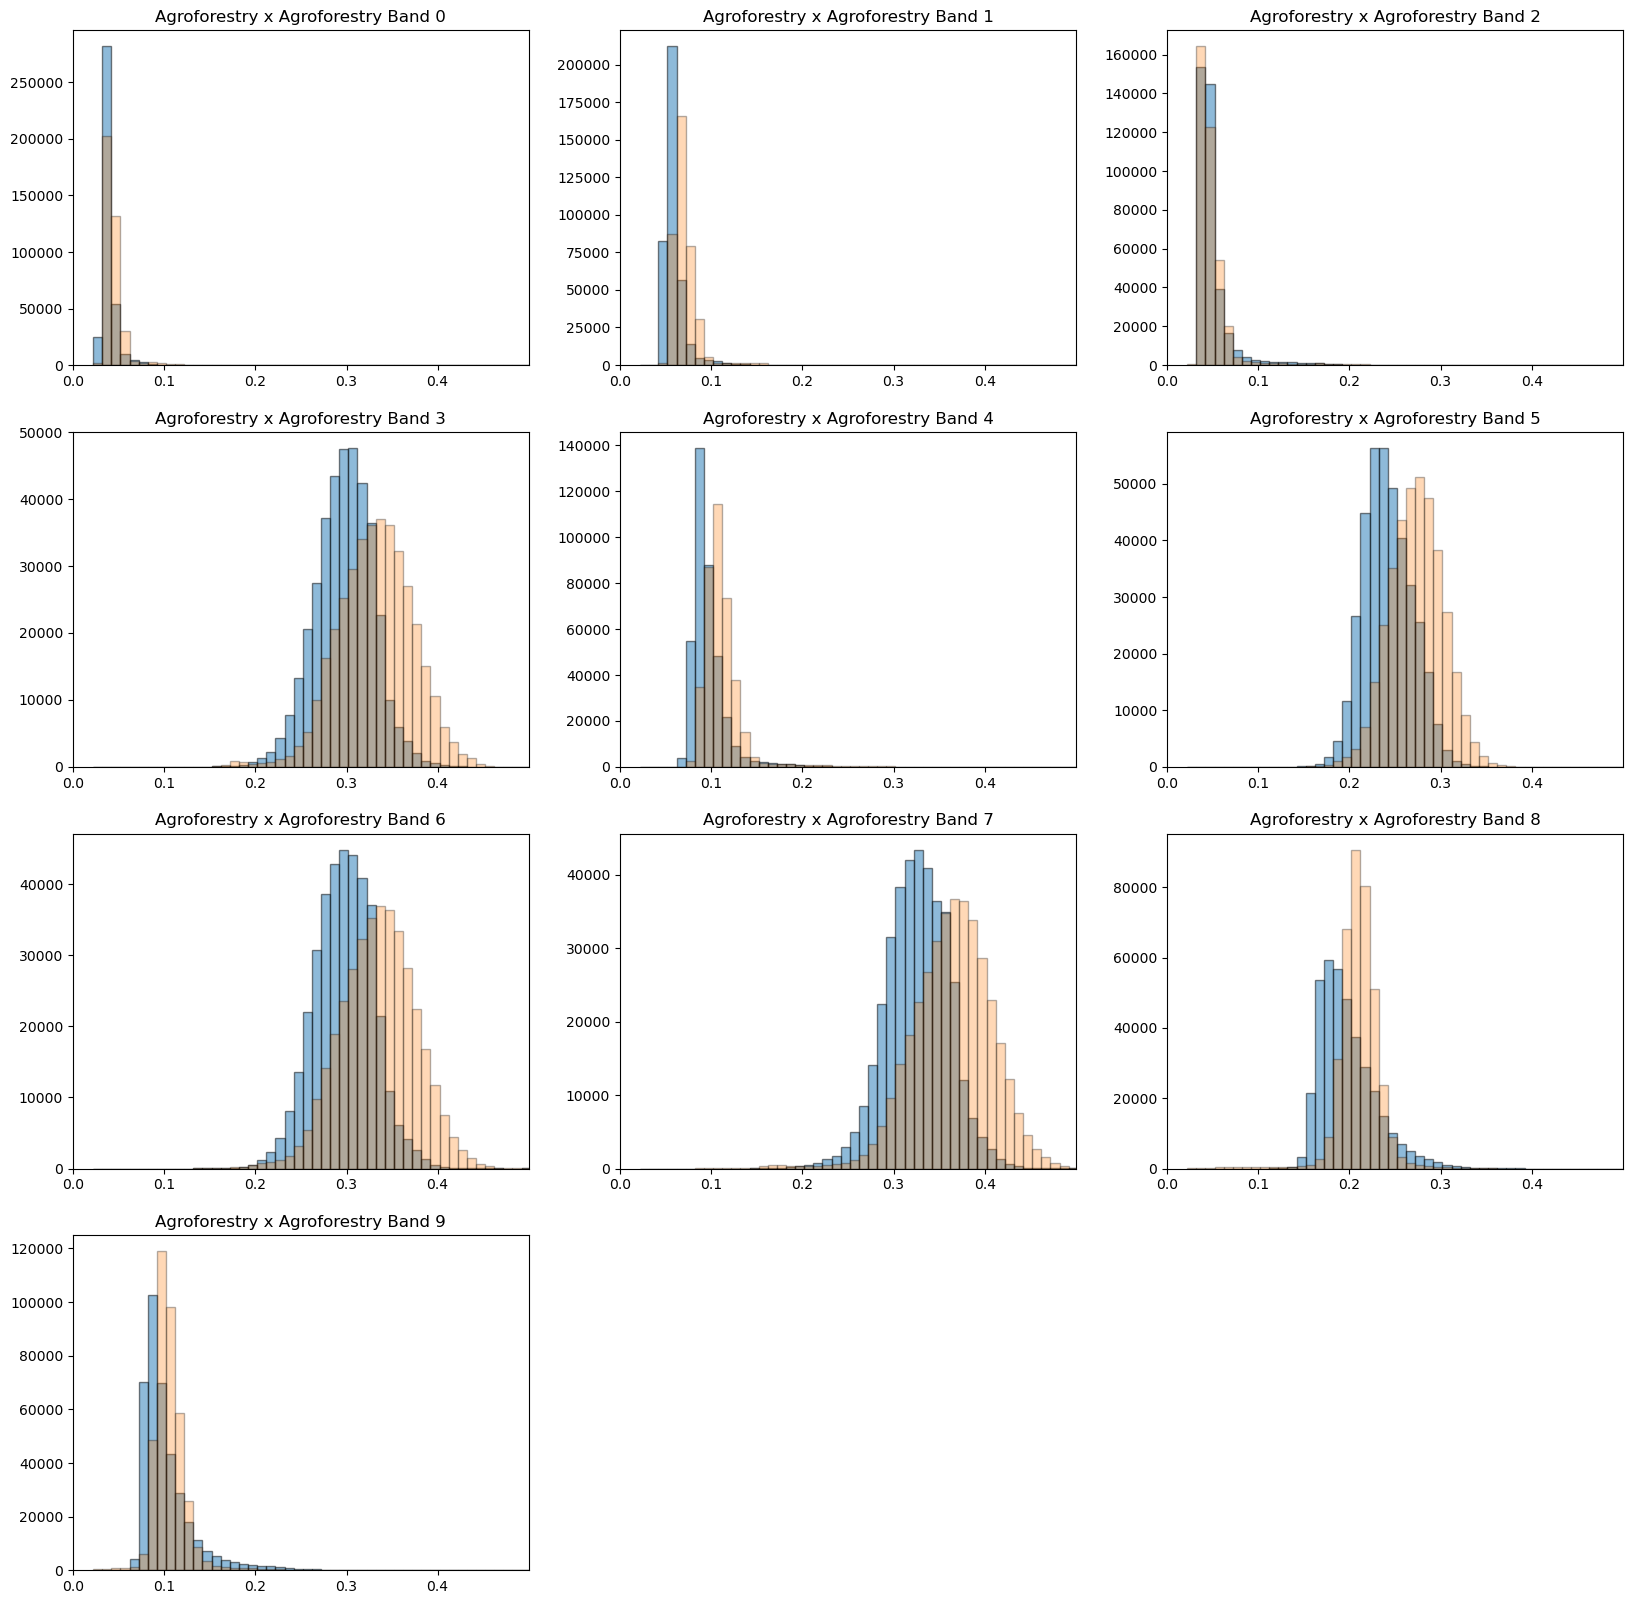

In [73]:
make.hist_compare_s2_byband('ghana', (1670, 1075), (1659, 1070), 'Agroforestry x Agroforestry');

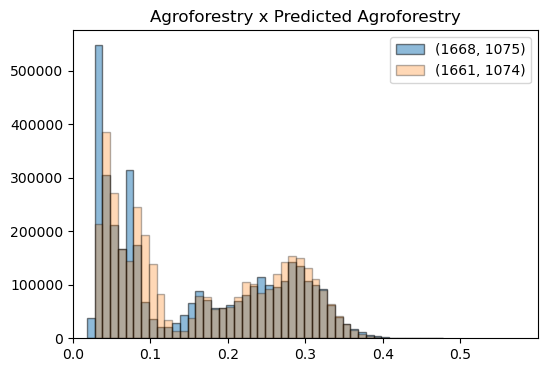

In [15]:
# the tile for abirem is agroforestry w some smallholder oil palm
# the tile for pd_southeast is a natural forest misclassified as agroforestry
make.hist_compare_s2('ghana', (1668, 1075), (1661, 1074), 'Agroforestry x Predicted Agroforestry');

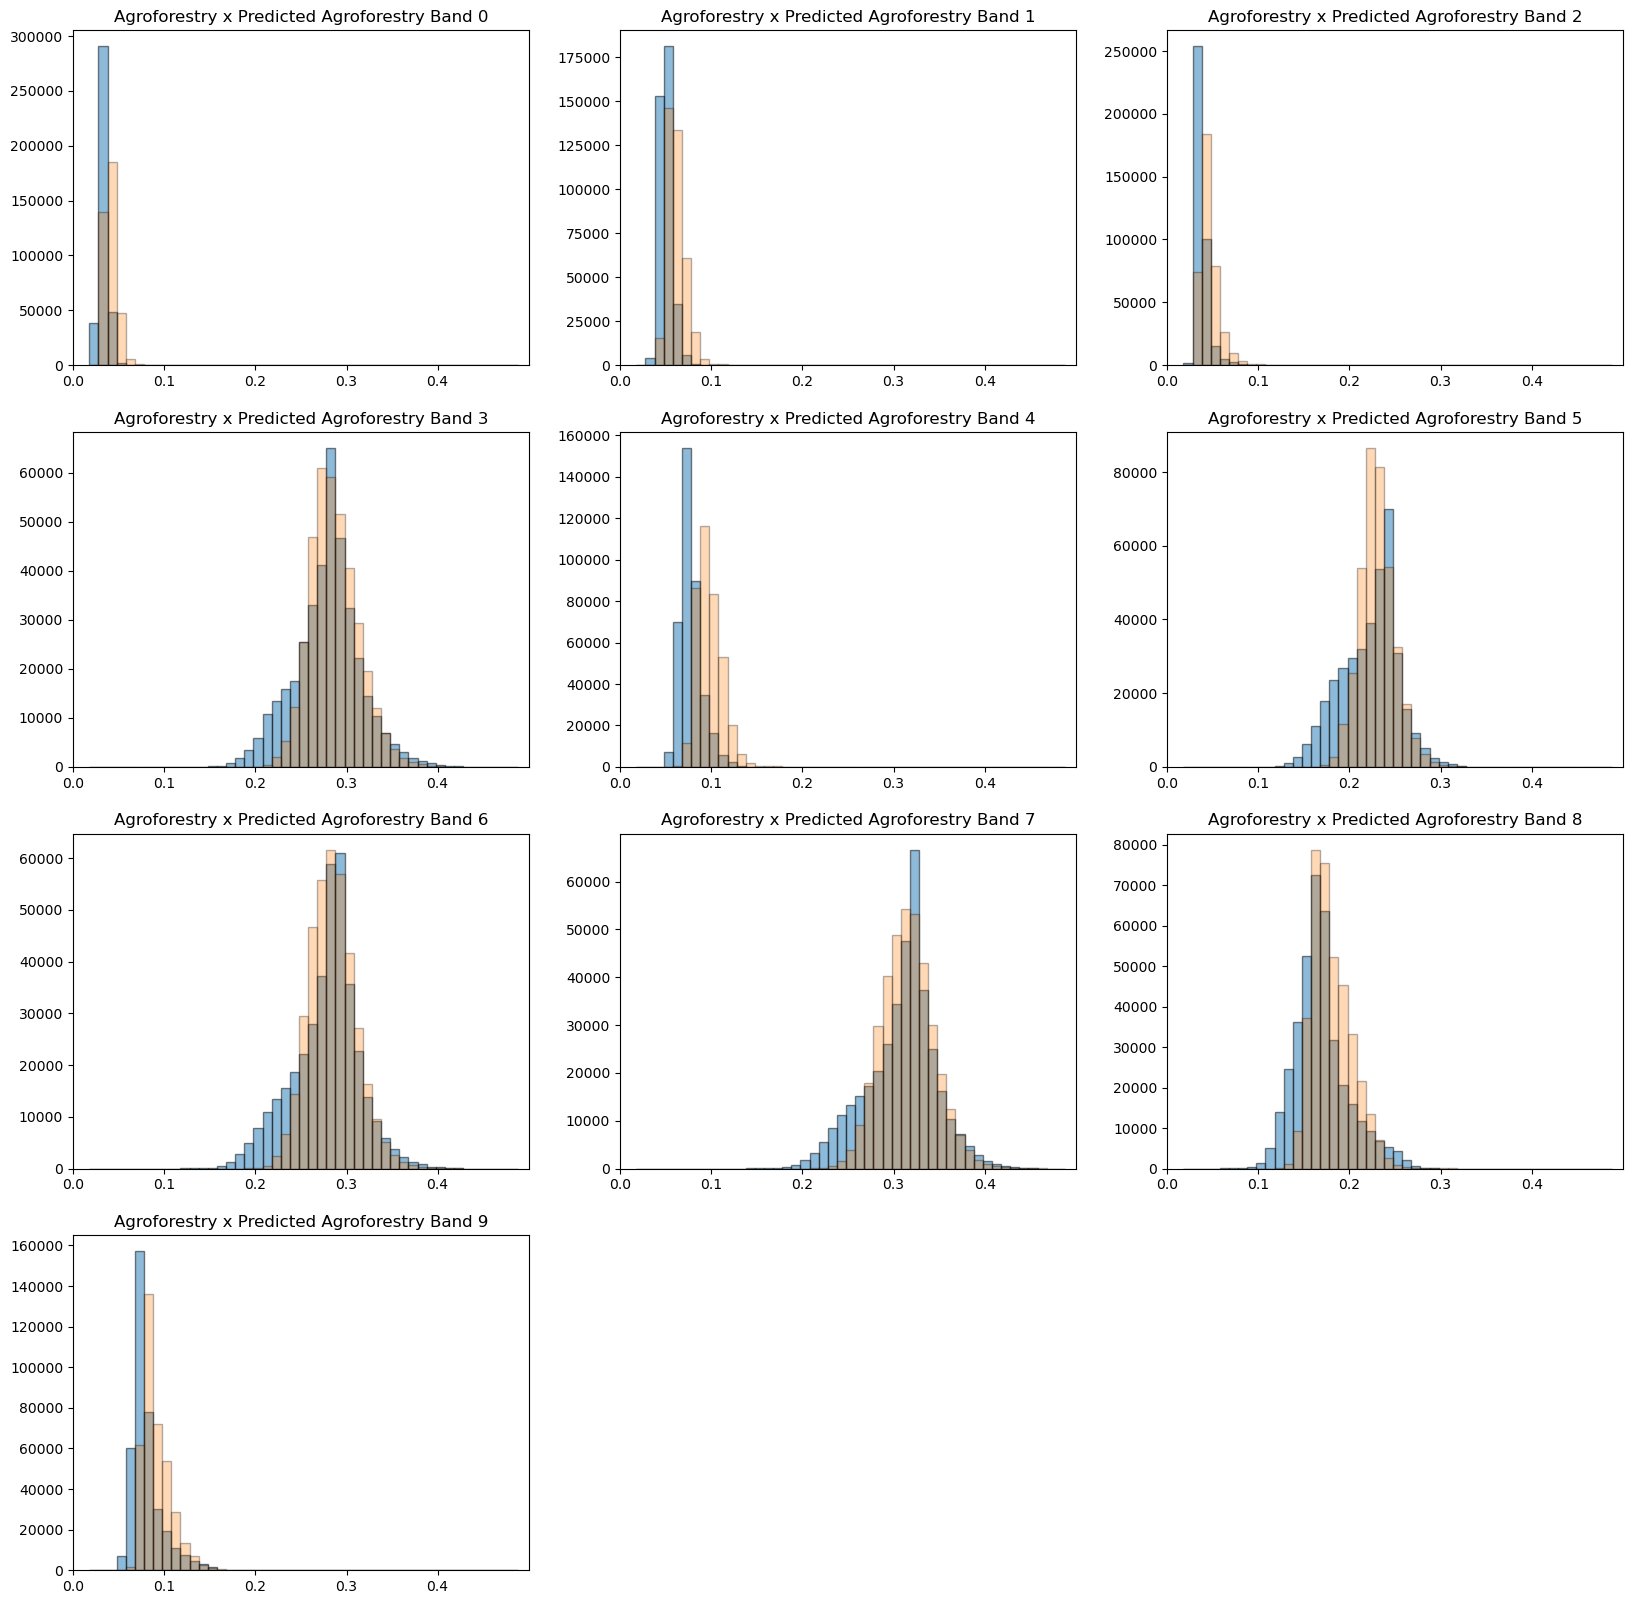

In [74]:
make.hist_compare_s2_byband('ghana', (1668, 1075), (1661, 1074), 'Agroforestry x Predicted Agroforestry');

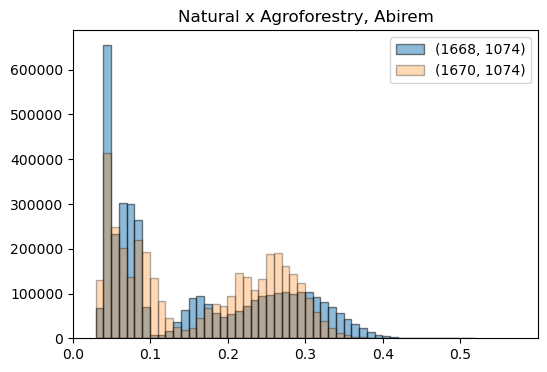

In [16]:
make.hist_compare_s2('ghana', (1668, 1074), (1670, 1074), 'Natural x Agroforestry, Abirem');

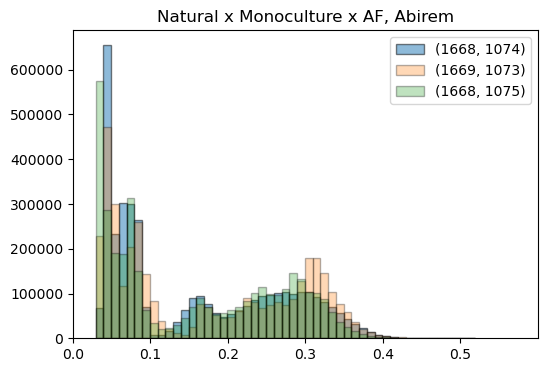

In [17]:
make.hist_compare_s2('ghana', (1668, 1074), (1669, 1073), 'Natural x Monoculture x AF, Abirem', (1668, 1075));

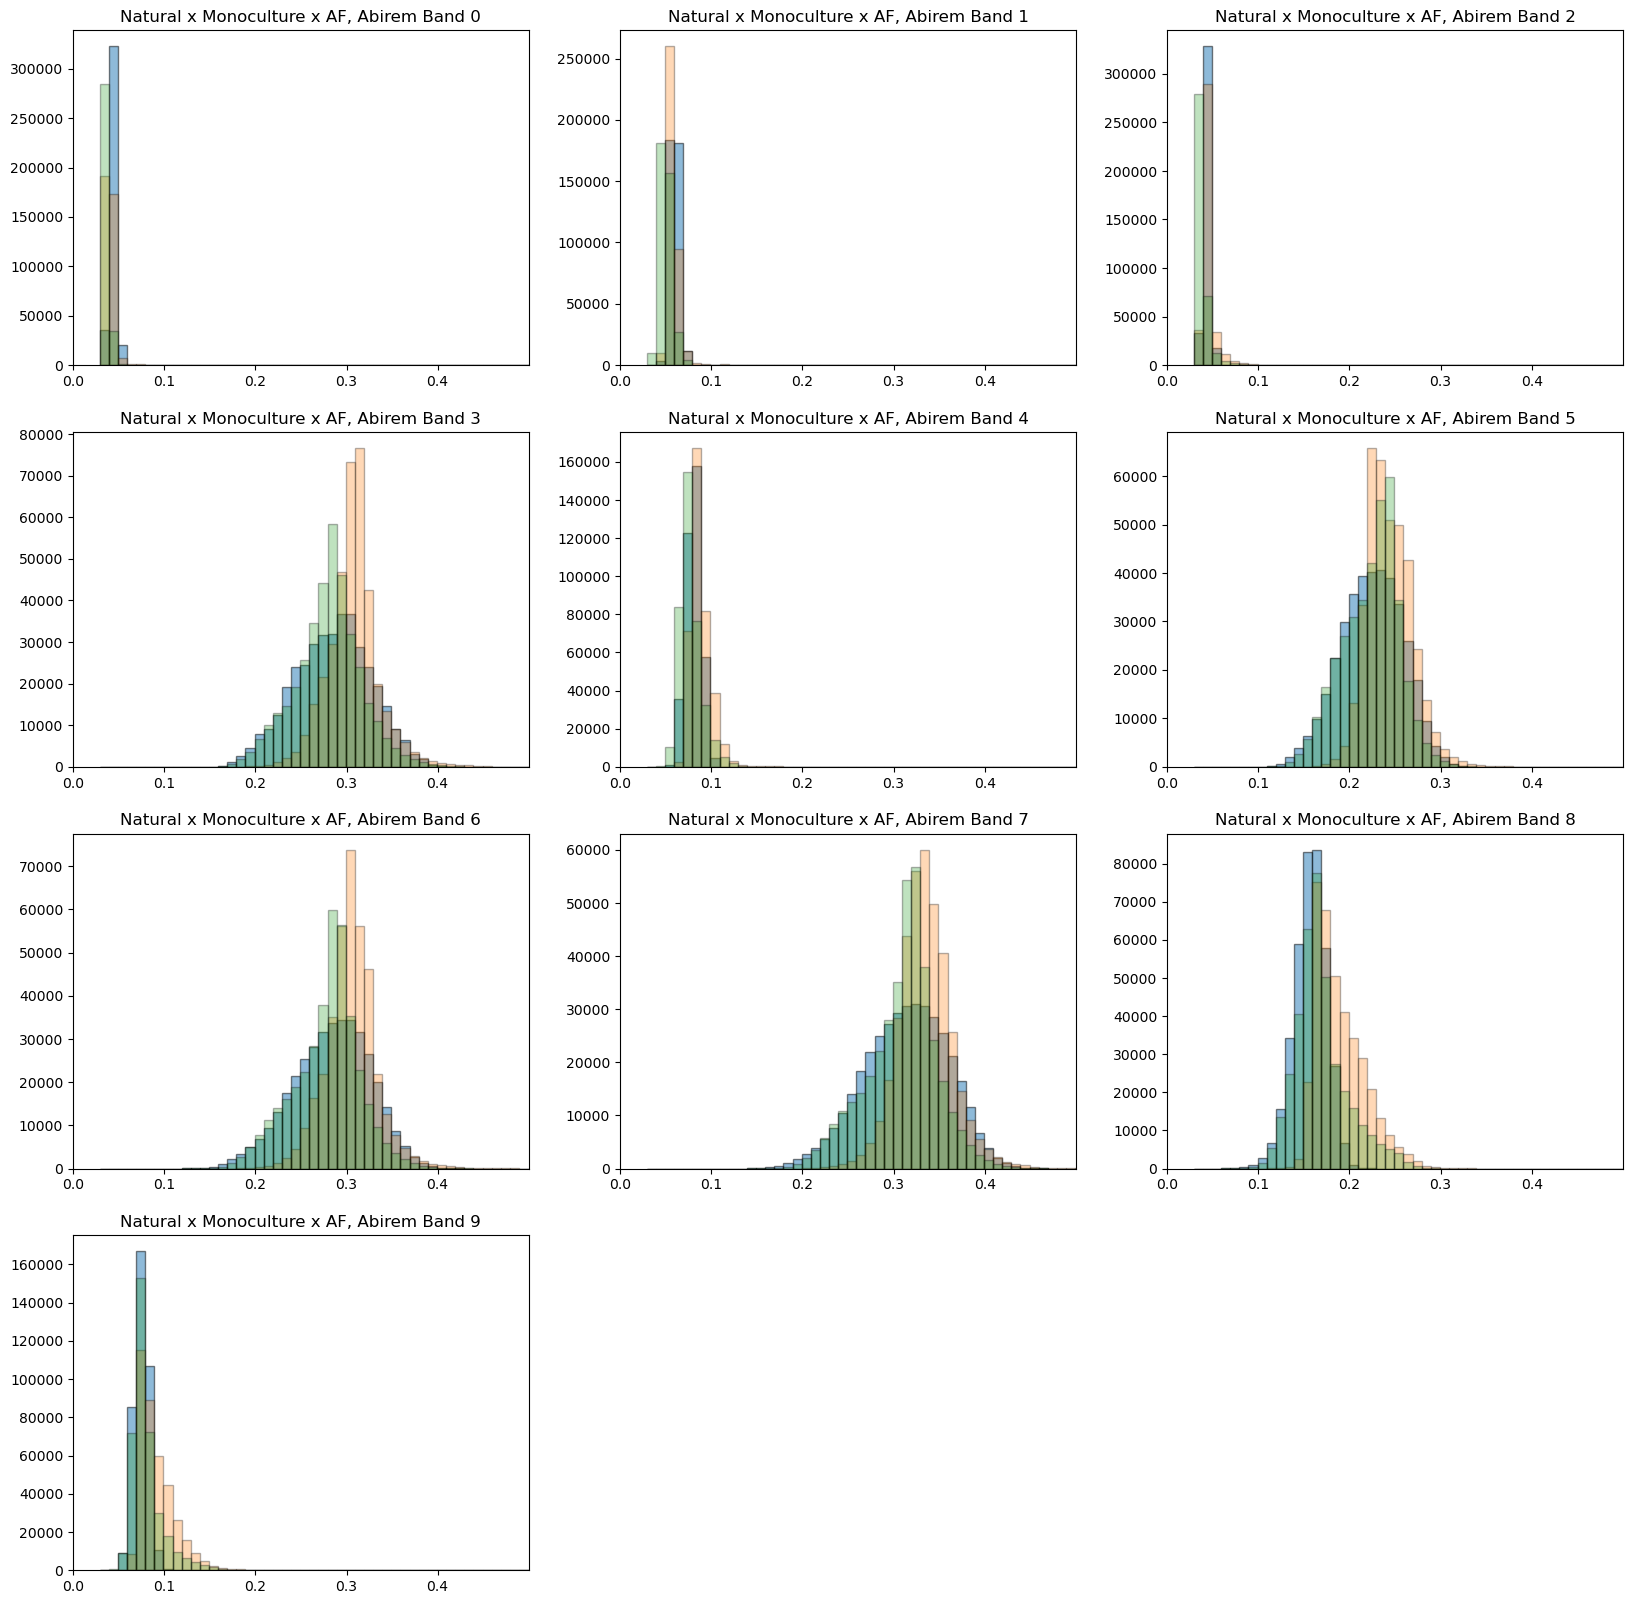

In [18]:
make.hist_compare_s2_byband('ghana', (1668, 1074), (1669, 1073), 'Natural x Monoculture x AF, Abirem', (1668, 1075));

In [ ]:
make.hist_compare_s2_byband('ghana', (1668, 1074), (1669, 1073), 'Natural x Monoculture x AF, Abirem', (1668, 1075));